# 6188025 Alisa Uthikamporn
# 6188089 Nattawipa Saetae
# 6188147 Soksedtha Ly

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Data Preparation

In [2]:
# Read csv file
df = pd.read_csv('startup-train.csv')
df.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,target
0,Fashion,Fashion,2016-05-25 00:00:00,2016-04-25 16:09:19,1,SE,0.60,2410.19,failed
1,Interactive Design,Design,2014-09-27 00:00:00,2014-08-28 05:19:04,3,AU,70.02,8751.97,failed
2,Musical,Theater,2015-07-12 00:00:00,2015-05-13 09:04:55,7,AU,251.65,5551.03,canceled
3,Children's Books,Publishing,2016-03-21 00:00:00,2016-02-20 23:45:40,0,US,0.00,10000.00,canceled
4,Fashion,Fashion,2016-01-09 00:00:00,2015-12-02 11:24:16,131,US,21231.00,20000.00,successful


In [3]:
df.describe()

,backers,pledged,goal
count,297840.000000,2.978400e+05,2.978400e+05
mean,107.948660,9.278561e+03,4.555210e+04
std,953.618936,9.642201e+04,1.131919e+06
min,0.000000,0.000000e+00,1.000000e-02
25%,2.000000,3.148000e+01,2.000000e+03
50%,12.000000,6.275100e+02,5.500000e+03
75%,57.000000,4.066000e+03,1.600000e+04
max,219382.000000,2.033899e+07,1.663614e+08


In [4]:
# Find missing values
df.isnull().sum()

sub_category    0
category        0
deadline        0
launched        0
backers         0
country         0
pledged         0
goal            0
target          0
dtype: int64

In [5]:
df.dtypes

sub_category     object
category         object
deadline         object
launched         object
backers           int64
country          object
pledged         float64
goal            float64
target           object
dtype: object

In [6]:
df['sub_category'].nunique()

159

In [7]:
df['category'].nunique()

15

Since there are quite many categories and sub categories, we cannot manually encode the labels. As a result, we will use "LabelEncoder" to encode these features.

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['sub_cat_code'] = lb_make.fit_transform(df['sub_category'])
df['cat_code'] = lb_make.fit_transform(df['category'])
df['country_code'] = lb_make.fit_transform(df['country'])
df.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,target,sub_cat_code,cat_code,country_code
0,Fashion,Fashion,2016-05-25 00:00:00,2016-04-25 16:09:19,1,SE,0.60,2410.19,failed,52,5,20
1,Interactive Design,Design,2014-09-27 00:00:00,2014-08-28 05:19:04,3,AU,70.02,8751.97,failed,74,4,1
2,Musical,Theater,2015-07-12 00:00:00,2015-05-13 09:04:55,7,AU,251.65,5551.03,canceled,92,14,1
3,Children's Books,Publishing,2016-03-21 00:00:00,2016-02-20 23:45:40,0,US,0.00,10000.00,canceled,19,12,22
4,Fashion,Fashion,2016-01-09 00:00:00,2015-12-02 11:24:16,131,US,21231.00,20000.00,successful,52,5,22


In [9]:
# Encode 'target' manually
df['target'] = df['target'].replace({'canceled': 0})
df['target'] = df['target'].replace({'failed': 1})
df['target'] = df['target'].replace({'suspended': 2})
df['target'] = df['target'].replace({'successful': 3})
df.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,target,sub_cat_code,cat_code,country_code
0,Fashion,Fashion,2016-05-25 00:00:00,2016-04-25 16:09:19,1,SE,0.60,2410.19,1,52,5,20
1,Interactive Design,Design,2014-09-27 00:00:00,2014-08-28 05:19:04,3,AU,70.02,8751.97,1,74,4,1
2,Musical,Theater,2015-07-12 00:00:00,2015-05-13 09:04:55,7,AU,251.65,5551.03,0,92,14,1
3,Children's Books,Publishing,2016-03-21 00:00:00,2016-02-20 23:45:40,0,US,0.00,10000.00,0,19,12,22
4,Fashion,Fashion,2016-01-09 00:00:00,2015-12-02 11:24:16,131,US,21231.00,20000.00,3,52,5,22


In [10]:
# Convert the strings to datetime objects
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df.dtypes

sub_category            object
category                object
deadline        datetime64[ns]
launched        datetime64[ns]
backers                  int64
country                 object
pledged                float64
goal                   float64
target                   int64
sub_cat_code             int32
cat_code                 int32
country_code             int32
dtype: object

In [11]:
# Find duplicate rows in the dataset
df[df.duplicated(keep=False)==True]

,sub_category,category,deadline,launched,backers,country,pledged,goal,target,sub_cat_code,cat_code,country_code


In [12]:
# Drop unnecessary columns
df = df.drop(columns=['sub_category', 'category',  'country'])

# Store year of the launched date into launched_year column
df['launched_year'] = df['launched'].dt.year

In [13]:
# morning version 
# data_df.head()

#edit
df.head()

,deadline,launched,backers,pledged,goal,target,sub_cat_code,cat_code,country_code,launched_year
0,2016-05-25,2016-04-25 16:09:19,1,0.60,2410.19,1,52,5,20,2016
1,2014-09-27,2014-08-28 05:19:04,3,70.02,8751.97,1,74,4,1,2014
2,2015-07-12,2015-05-13 09:04:55,7,251.65,5551.03,0,92,14,1,2015
3,2016-03-21,2016-02-20 23:45:40,0,0.00,10000.00,0,19,12,22,2016
4,2016-01-09,2015-12-02 11:24:16,131,21231.00,20000.00,3,52,5,22,2015


## 2. Feature Selection

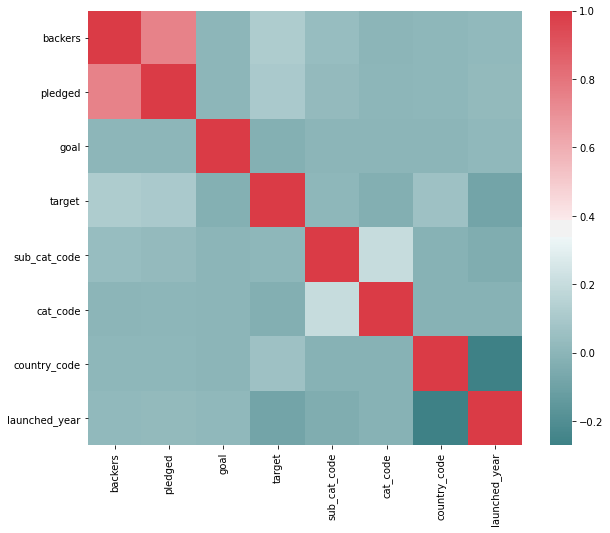

In [14]:
# Check the correlation between features in the dataset
fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

In [15]:
corr

,backers,pledged,goal,target,sub_cat_code,cat_code,country_code,launched_year
backers,1.000000,0.747901,0.005031,0.119352,0.040595,0.000672,0.011920,0.017403
pledged,0.747901,1.000000,0.005913,0.102105,0.029058,0.005733,0.010041,0.022443
goal,0.005031,0.005913,1.000000,-0.022937,0.002057,0.001798,-0.001258,0.013114
target,0.119352,0.102105,-0.022937,1.000000,0.011664,-0.030968,0.065655,-0.086781
sub_cat_code,0.040595,0.029058,0.002057,0.011664,1.000000,0.197787,-0.012775,-0.039183
cat_code,0.000672,0.005733,0.001798,-0.030968,0.197787,1.000000,-0.012954,-0.015004
country_code,0.011920,0.010041,-0.001258,0.065655,-0.012775,-0.012954,1.000000,-0.270615
launched_year,0.017403,0.022443,0.013114,-0.086781,-0.039183,-0.015004,-0.270615,1.000000


In [16]:
#add more in part 2
diff = df.pledged- df.goal
df['gp_diff'] = diff
df['gp_diff'].head()

0    -2409.59
1    -8681.95
2    -5299.38
3   -10000.00
4     1231.00
Name: gp_diff, dtype: float64

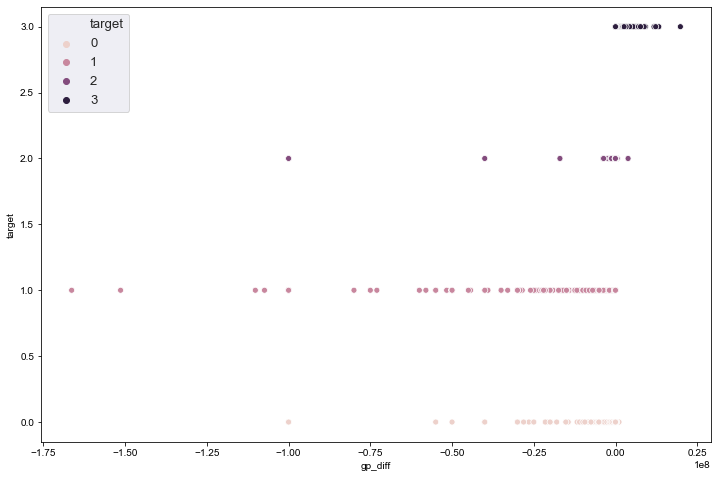

In [17]:
#add more in part 2
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="gp_diff", y="target", hue='target', data=df)

In [18]:
# Convert float to int
df['pledged'] = df['pledged'].round().astype('int64')
df['goal'] = df['goal'].round().astype('int64')
df['gp_diff'] = df['gp_diff'].round().astype('int64')


df.head()

,deadline,launched,backers,pledged,goal,target,sub_cat_code,cat_code,country_code,launched_year,gp_diff
0,2016-05-25,2016-04-25 16:09:19,1,1,2410,1,52,5,20,2016,-2410
1,2014-09-27,2014-08-28 05:19:04,3,70,8752,1,74,4,1,2014,-8682
2,2015-07-12,2015-05-13 09:04:55,7,252,5551,0,92,14,1,2015,-5299
3,2016-03-21,2016-02-20 23:45:40,0,0,10000,0,19,12,22,2016,-10000
4,2016-01-09,2015-12-02 11:24:16,131,21231,20000,3,52,5,22,2015,1231


According to the correlation plot above, it shows that most features have quite a weak relation with the target because most of them are categorical. The features that have the strongest relation to the target include the backers and pledges.

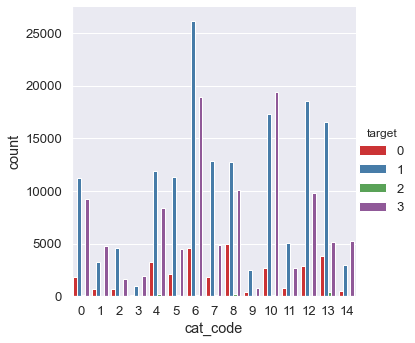

In [19]:
sns.catplot(data=df, hue='target', x='cat_code', kind='count', palette='Set1')

It seems that there is an extremely high failure rate for category 6. However, the success rate is also a bit higher than other categories. For category 10, it has similar success rate to category 6, but it come with a lot less failure rate, which is better for people to invest in.

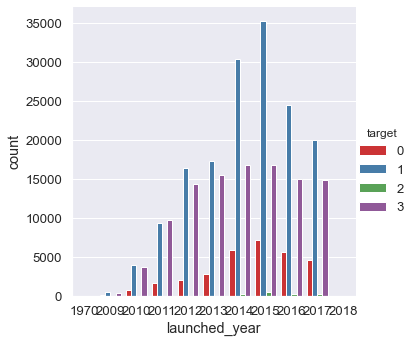

In [20]:
sns.catplot(data=df, hue='target', x='launched_year', kind='count', palette='Set1')

It appears that in 2014, the number of the start ups that fail starts increasing until it peaks in 2015. After that, the number greatly decreases. Therefore, the launched year also affects the status of the startups. 

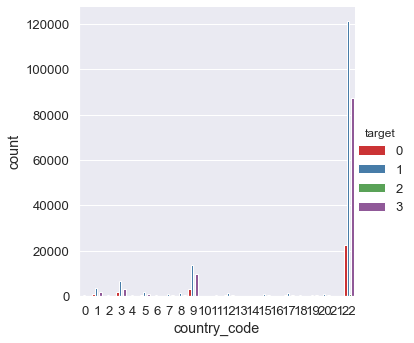

In [21]:
sns.catplot(data = df, hue='target', x='country_code', kind='count', palette='Set1')

It seems that most startups locate in only one country.

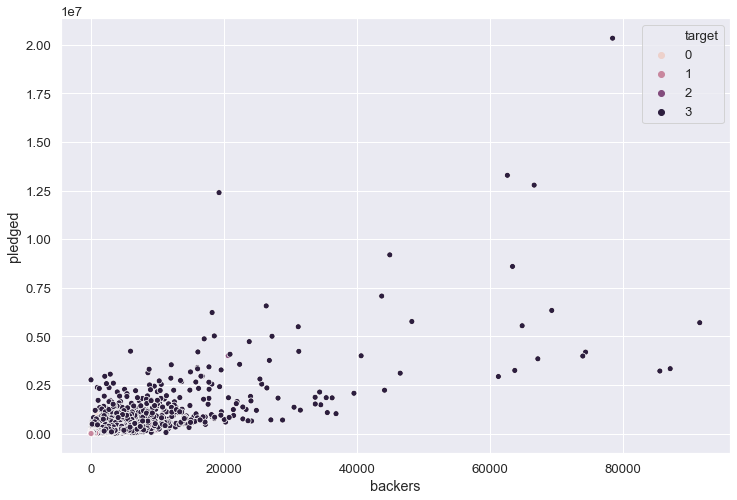

In [22]:
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="backers", y="pledged", hue='target', data=df[df['backers']<100000])

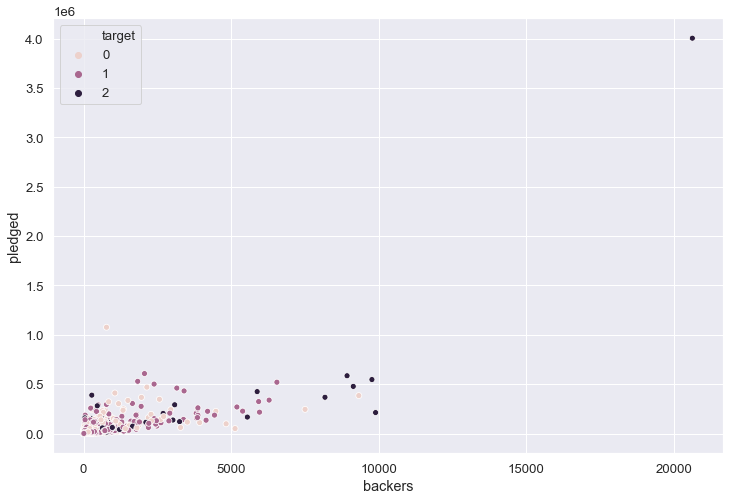

In [23]:
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="backers", y="pledged", hue='target', data=df[df['target']!=3])

It seems that the startups that did not succeed mostly had backers less than 5000.

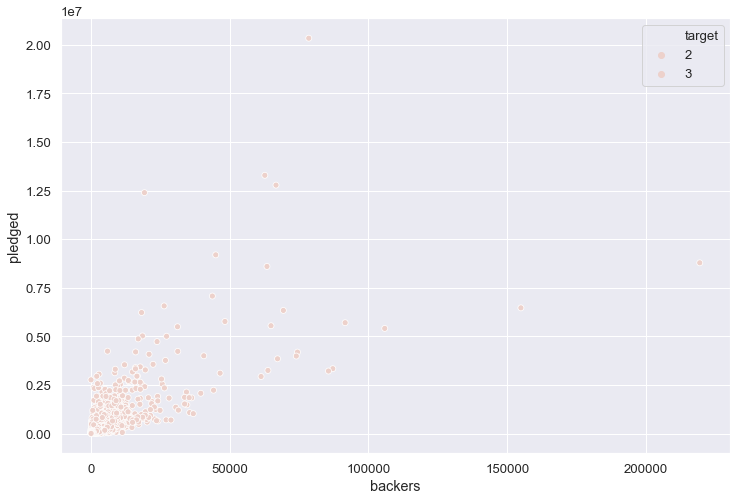

In [24]:
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="backers", y="pledged", hue='target', data=df[df['target']==3])

It seems that success of the startups are scattered all around the plot.

In summary, the features that affect the status of the startups are 'backers','pledged','launched_year', and 'cat_code'

"Backers" : If smaller than 5000, it is likely to fail. <br>
"Pledged" : The range between 0.0 to 0.25 is where most startups are successful.  <br>
"Launched year" : In 2014, the number of the start ups that fail starts increasing until it peaks in 2015. After that, the number greatly decreases.  <br>
"Category" : It seems that the most successful category with an acceptable failure rate is Category 10.

In [29]:
# morning version 
# feature_names = data_df[['backers','pledged','launched_year','cat_code','target']]
# feature_names

#edit
feature_names = df[['backers','pledged','launched_year','target','cat_code','gp_diff']]
feature_names

,backers,pledged,launched_year,target,cat_code,gp_diff
0,1,1,2016,1,5,-2410
1,3,70,2014,1,4,-8682
2,7,252,2015,0,14,-5299
3,0,0,2016,0,12,-10000
4,131,21231,2015,3,5,1231
...,...,...,...,...,...,...
297835,3,102,2014,1,13,-39898
297836,2,40,2016,1,4,-19960
297837,155,15745,2015,0,4,-9255
297838,36,5004,2014,3,6,30


In [30]:
feature_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297840 entries, 0 to 297839
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   backers        297840 non-null  int64
 1   pledged        297840 non-null  int64
 2   launched_year  297840 non-null  int64
 3   target         297840 non-null  int64
 4   cat_code       297840 non-null  int32
 5   gp_diff        297840 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 12.5 MB


# 2nd Part : Individual  (Afternoon)

Task 1

In [31]:
# Read csv file
dff = pd.read_csv('startup-test.csv')
dff.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal
0,Apparel,Fashion,2015-04-13 00:00:00,2015-03-14 09:24:34,11,AU,870.31,781.25
1,Design,Design,2016-05-06 00:00:00,2016-03-22 18:16:15,4,US,17.00,5000.00
2,Technology,Technology,2017-12-09 00:00:00,2017-11-09 04:53:45,2,US,125.00,5950.00
3,Public Art,Art,2016-05-15 00:00:00,2016-04-15 21:12:25,13,US,1515.00,1500.00
4,Product Design,Design,2016-01-07 00:00:00,2015-12-11 10:21:40,1,IT,32.58,21721.89


In [32]:
X_train = feature_names.drop(columns=['target'])
y_train = feature_names['target'].values

In [33]:
print(f'Training set: {X_train.shape}, {y_train.shape}')

Training set: (297840, 5), (297840,)


#### (̶◉͛‿◉̶) OPTUNA (̶◉͛‿◉̶)
Model selection


In [34]:
import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials = 100)

study.best_params

[I 2021-03-19 15:51:38,341] A new study created in memory with name: no-name-fdab583d-8a03-4b18-9e0a-7a6b3dd61c77
[I 2021-03-19 15:51:38,347] Trial 0 finished with value: 3.8795588489187693 and parameters: {'x': 0.030340423088606627}. Best is trial 0 with value: 3.8795588489187693.
[I 2021-03-19 15:51:38,349] Trial 1 finished with value: 60.39440208461618 and parameters: {'x': -5.771383537351388}. Best is trial 0 with value: 3.8795588489187693.
[I 2021-03-19 15:51:38,351] Trial 2 finished with value: 1.6297562469270712 and parameters: {'x': 0.7233809311595447}. Best is trial 2 with value: 1.6297562469270712.
[I 2021-03-19 15:51:38,354] Trial 3 finished with value: 10.455051027696504 and parameters: {'x': -1.2334271335065683}. Best is trial 2 with value: 1.6297562469270712.
[I 2021-03-19 15:51:38,357] Trial 4 finished with value: 75.53419600824607 and parameters: {'x': -6.691041134884017}. Best is trial 2 with value: 1.6297562469270712.
[I 2021-03-19 15:51:38,360] Trial 5 finished with 

[I 2021-03-19 15:51:38,853] Trial 45 finished with value: 6.076823060806446 and parameters: {'x': -0.46512130752351544}. Best is trial 21 with value: 0.0025204650643672524.
[I 2021-03-19 15:51:38,868] Trial 46 finished with value: 1.7195523731368527 and parameters: {'x': 0.6886829623859634}. Best is trial 21 with value: 0.0025204650643672524.
[I 2021-03-19 15:51:38,880] Trial 47 finished with value: 11.797264474053714 and parameters: {'x': -1.4347146131889494}. Best is trial 21 with value: 0.0025204650643672524.
[I 2021-03-19 15:51:38,891] Trial 48 finished with value: 0.04449819523140016 and parameters: {'x': 2.2109459533420828}. Best is trial 21 with value: 0.0025204650643672524.
[I 2021-03-19 15:51:38,905] Trial 49 finished with value: 0.6578734924805375 and parameters: {'x': 2.8110940096440964}. Best is trial 21 with value: 0.0025204650643672524.
[I 2021-03-19 15:51:38,917] Trial 50 finished with value: 4.634031766719672 and parameters: {'x': 4.152680135719116}. Best is trial 21 wi

[I 2021-03-19 15:51:39,437] Trial 90 finished with value: 9.724529705369783 and parameters: {'x': -1.118417820845979}. Best is trial 71 with value: 1.9315697480091638e-05.
[I 2021-03-19 15:51:39,448] Trial 91 finished with value: 0.020961730877161227 and parameters: {'x': 2.144781666232853}. Best is trial 71 with value: 1.9315697480091638e-05.
[I 2021-03-19 15:51:39,461] Trial 92 finished with value: 0.007447375915194481 and parameters: {'x': 2.086298180254247}. Best is trial 71 with value: 1.9315697480091638e-05.
[I 2021-03-19 15:51:39,475] Trial 93 finished with value: 0.4338697107350769 and parameters: {'x': 1.3413121295066404}. Best is trial 71 with value: 1.9315697480091638e-05.
[I 2021-03-19 15:51:39,487] Trial 94 finished with value: 0.4745361177976563 and parameters: {'x': 2.688865819879065}. Best is trial 71 with value: 1.9315697480091638e-05.
[I 2021-03-19 15:51:39,499] Trial 95 finished with value: 0.00244848874503527 and parameters: {'x': 1.950517793652311}. Best is trial 7

{'x': 1.9956050372606708}

In [35]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    classifier_name = trial.suggest_categorical("classifier", ["LogisticRegression","DecisionTree"])
    
              
    #Logistic Regression: try to change C and penalty.
    if classifier_name == "LogisticRegression": 
        
        lr_c = trial.suggest_float("lr_c", 1e-10, 1e10, log = True)
        classifier_obj = LogisticRegression(C = lr_c)
        
    #Decision Tree
    else:
        dt_max_depth = trial.suggest_int("dt_max_depth", 2, 42)
        classifier_obj = sklearn.tree.DecisionTreeClassifier( max_depth = dt_max_depth)
        
    # optuna use cross validation    
    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs = -1, cv = 3)
    accuracy = score.mean()
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials = 100)
    print(study.best_trial)

[I 2021-03-19 15:51:39,725] A new study created in memory with name: no-name-f6ceb571-23fc-4dad-8868-ae9e8c8c31f6
[I 2021-03-19 15:51:43,458] Trial 0 finished with value: 0.9733333333333333 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 1603793.9241116052}. Best is trial 0 with value: 0.9733333333333333.
[I 2021-03-19 15:51:45,083] Trial 1 finished with value: 0.9733333333333333 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 9257.26299594097}. Best is trial 0 with value: 0.9733333333333333.
[I 2021-03-19 15:51:46,625] Trial 2 finished with value: 0.96 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 39}. Best is trial 0 with value: 0.9733333333333333.
[I 2021-03-19 15:51:46,770] Trial 3 finished with value: 0.9333333333333332 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 2}. Best is trial 0 with value: 0.9733333333333333.
[I 2021-03-19 15:51:46,807] Trial 4 finished with value: 0.32 and parameters: {'classifier': 'LogisticRegre

[I 2021-03-19 15:51:50,276] Trial 40 finished with value: 0.9533333333333333 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 19}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:50,396] Trial 41 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 47.65465779311918}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:50,528] Trial 42 finished with value: 0.9666666666666667 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 136.1246747762004}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:50,638] Trial 43 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 11.946805672859206}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:50,751] Trial 44 finished with value: 0.9733333333333333 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 5824.383904928285}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:50,888] Trial 45 finished with value: 0.973333333333333

[I 2021-03-19 15:51:54,513] Trial 81 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 19.9599509900158}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:54,625] Trial 82 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 14.428304429893142}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:54,720] Trial 83 finished with value: 0.9733333333333333 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 1.415020811855268}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:54,827] Trial 84 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 16.299519785505076}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:54,940] Trial 85 finished with value: 0.98 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 6.774424923612829}. Best is trial 11 with value: 0.98.
[I 2021-03-19 15:51:55,041] Trial 86 finished with value: 0.98 and parameters: {'classifie

FrozenTrial(number=11, values=[0.98], datetime_start=datetime.datetime(2021, 3, 19, 15, 51, 47, 414678), datetime_complete=datetime.datetime(2021, 3, 19, 15, 51, 47, 528685), params={'classifier': 'LogisticRegression', 'lr_c': 13.54390623051175}, distributions={'classifier': CategoricalDistribution(choices=('LogisticRegression', 'DecisionTree')), 'lr_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=11, state=TrialState.COMPLETE, value=None)


In [36]:
# best trial result
print(f"The best trial is : \n{study.best_trial}")

The best trial is : 
FrozenTrial(number=11, values=[0.98], datetime_start=datetime.datetime(2021, 3, 19, 15, 51, 47, 414678), datetime_complete=datetime.datetime(2021, 3, 19, 15, 51, 47, 528685), params={'classifier': 'LogisticRegression', 'lr_c': 13.54390623051175}, distributions={'classifier': CategoricalDistribution(choices=('LogisticRegression', 'DecisionTree')), 'lr_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=11, state=TrialState.COMPLETE, value=None)


In [37]:
# best value result
print(f"The best value is : {study.best_value}")

The best value is : 0.98


In [38]:
# best parameters result
print(f"The best parameters are : \n{study.best_params}")

The best parameters are : 
{'classifier': 'LogisticRegression', 'lr_c': 13.54390623051175}


By using an 'OPTUNA' to look for the best model prediction it show that 'LogisticRegression' is the best model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

model = LogisticRegression()
model = model.fit(X_train, y_train)

C:\Users\nammy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_hat_train = model.predict(X_train)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
# print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
# print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train,average="micro"):.2f}')


Training Set
[[     0  29190      0   1851]
 [     0 150819      0   7161]
 [     0   1040      0    451]
 [     0      0      0 107328]]
Accuracy: 0.87
F1-score: 0.87


In [42]:
lb_make = LabelEncoder()
dff['sub_cat_code'] = lb_make.fit_transform(dff['sub_category'])
dff['cat_code'] = lb_make.fit_transform(dff['category'])
dff['country_code'] = lb_make.fit_transform(dff['country'])
dff.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,sub_cat_code,cat_code,country_code
0,Apparel,Fashion,2015-04-13 00:00:00,2015-03-14 09:24:34,11,AU,870.31,781.25,7,5,1
1,Design,Design,2016-05-06 00:00:00,2016-03-22 18:16:15,4,US,17.00,5000.00,37,4,22
2,Technology,Technology,2017-12-09 00:00:00,2017-11-09 04:53:45,2,US,125.00,5950.00,138,13,22
3,Public Art,Art,2016-05-15 00:00:00,2016-04-15 21:12:25,13,US,1515.00,1500.00,114,0,22
4,Product Design,Design,2016-01-07 00:00:00,2015-12-11 10:21:40,1,IT,32.58,21721.89,113,4,12


In [43]:
# Convert the strings to datetime objects
dff['deadline'] = pd.to_datetime(dff['deadline'])
dff['launched'] = pd.to_datetime(dff['launched'])
dff.dtypes

sub_category            object
category                object
deadline        datetime64[ns]
launched        datetime64[ns]
backers                  int64
country                 object
pledged                float64
goal                   float64
sub_cat_code             int32
cat_code                 int32
country_code             int32
dtype: object

In [44]:
# Find duplicate rows in the dataset
dff[dff.duplicated(keep=False)==True]

,sub_category,category,deadline,launched,backers,country,pledged,goal,sub_cat_code,cat_code,country_code


In [45]:
# # Drop unnecessary columns
# dff = dff.drop(columns=['sub_category', 'category',  'country'])

# # Store year of the launched date into launched_year column
# dff['launched_year'] = dff['launched'].dt.year

# dff.head()

In [46]:
dff.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,sub_cat_code,cat_code,country_code
0,Apparel,Fashion,2015-04-13,2015-03-14 09:24:34,11,AU,870.31,781.25,7,5,1
1,Design,Design,2016-05-06,2016-03-22 18:16:15,4,US,17.00,5000.00,37,4,22
2,Technology,Technology,2017-12-09,2017-11-09 04:53:45,2,US,125.00,5950.00,138,13,22
3,Public Art,Art,2016-05-15,2016-04-15 21:12:25,13,US,1515.00,1500.00,114,0,22
4,Product Design,Design,2016-01-07,2015-12-11 10:21:40,1,IT,32.58,21721.89,113,4,12


In [47]:
diff_f = dff.pledged- dff.goal
dff['gp_diff'] = diff_f
dff['gp_diff'].head()

0       89.06
1    -4983.00
2    -5825.00
3       15.00
4   -21689.31
Name: gp_diff, dtype: float64

In [48]:
dff.head()

,sub_category,category,deadline,launched,backers,country,pledged,goal,sub_cat_code,cat_code,country_code,gp_diff
0,Apparel,Fashion,2015-04-13,2015-03-14 09:24:34,11,AU,870.31,781.25,7,5,1,89.06
1,Design,Design,2016-05-06,2016-03-22 18:16:15,4,US,17.00,5000.00,37,4,22,-4983.00
2,Technology,Technology,2017-12-09,2017-11-09 04:53:45,2,US,125.00,5950.00,138,13,22,-5825.00
3,Public Art,Art,2016-05-15,2016-04-15 21:12:25,13,US,1515.00,1500.00,114,0,22,15.00
4,Product Design,Design,2016-01-07,2015-12-11 10:21:40,1,IT,32.58,21721.89,113,4,12,-21689.31


In [49]:
dff = dff.drop(columns=['deadline', 'launched'])
dff.head()

,sub_category,category,backers,country,pledged,goal,sub_cat_code,cat_code,country_code,gp_diff
0,Apparel,Fashion,11,AU,870.31,781.25,7,5,1,89.06
1,Design,Design,4,US,17.00,5000.00,37,4,22,-4983.00
2,Technology,Technology,2,US,125.00,5950.00,138,13,22,-5825.00
3,Public Art,Art,13,US,1515.00,1500.00,114,0,22,15.00
4,Product Design,Design,1,IT,32.58,21721.89,113,4,12,-21689.31


In [51]:
feature_names = dff[['sub_category','category','backers','country','pledged','gp_diff']]
feature_names

,sub_category,category,backers,country,pledged,gp_diff
0,Apparel,Fashion,11,AU,870.31,89.06
1,Design,Design,4,US,17.00,-4983.00
2,Technology,Technology,2,US,125.00,-5825.00
3,Public Art,Art,13,US,1515.00,15.00
4,Product Design,Design,1,IT,32.58,-21689.31
...,...,...,...,...,...,...
74455,Nonfiction,Publishing,3,GB,183.34,-5877.63
74456,Photobooks,Photography,1,US,5.00,-1195.00
74457,Photography,Photography,27,US,1012.00,-7988.00
74458,Journalism,Journalism,0,AU,0.00,-7796.06


In [55]:
y_pred = model.predict(dff)

ValueError: could not convert string to float: 'Apparel'

In [56]:
import csv

wtr = csv.writer(open ('./labelx.csv', 'w'), delimiter=',', lineterminator='\n')

for y in y_pred: wtr.writerow([y])

NameError: name 'y_pred' is not defined

In [57]:
file = pd.DataFrame(y_pred)
file.to_csv('label.csv', sep='\t', encoding='utf-8', index=False)

NameError: name 'y_pred' is not defined

Task 2